# Pose Config Handbook for Augmentation-related Parameters 

Hello! Mabuhay! 
In this notebook, we will have a rundown on the following pose config parameters related to data augmentation:
- *scale_jitter_lo*
- *scale_jitter_up*
- *rotation*
- *rotratio*
- *mirror* 

# Outline
1. [Goal](#Goal) 
2. [What is data augmentation?](#What-+-is-+-data-+-augmentation?)
3. [Deep-dive into the augmentation-related parameters](#Deep-dive-+-into-+-the-+-augmentation-related-+-parameters)
4. [Final comments](#Final-+-comments)

# 1. Goal 
By the end of this short lesson, you should have a little bit more understanding of how to play around with the data augmentation-related parameters and tweak it further to fit your dataset.

# 2. What is data augmentation?
In the simplest form, we can think of data augmentation as something similar to imagination or dreaming. Humans imagine diferent scenarios based on experience, ultimately allowing us to gain a better understanding of our world.

In a similar way, we train our models to different types of "imagined" scenarios, which we limit to the foreseeable ones, so we ultimately get a robust model that can more likely handle new data and scenes. 

Classes of data augmentations, characterized by their nature, are given by:
- **Geometric transformations** such as *flipping*, *rotating*, *translating*, *cropping*, *scaling*, and *injecting noise*, which are very good for positional biases present in the training data.

- **Color space transformations**, such as contrast-limited adaptive histogram equalization (CLAHE), basic histogram equalization, and color jittering, which intiuitively allow your model to handle photometric distortions such as sudden light glares, and balancing out dark/bright scenes. 

- **Kernel transformations** such as *image sharpening* and *blurring*. Intuitively, *blurring images* could lead to higher resistance to motion blur during testing, and *sharpening images* could result in encapsulating more details about objects of interest.

# 3. Deep-dive into the augmentation-related parameters

1. [scale_jitter_lo](#scale_jitter_lo)
2. [scale_jitter_up](#scale_jitter_up)
3. [rotation](#rotation)
4. [rotratio](#rotratio)
5. [mirror](#mirror)

## 3.1and 3.2 scale_jitter_lo and scale_jitter_up 

### *What is scale jittering?*
Scale jittering resizes and crops an image within a given resize range. The two most common methods are **(a) Standard Scale Jittering (SSJ)** and **(b) Large Scale Jittering (LSJ)**, which have their own recommended rezise range.

The image below, retrieved from CITE HERE, illustrates the difference between the two methods.

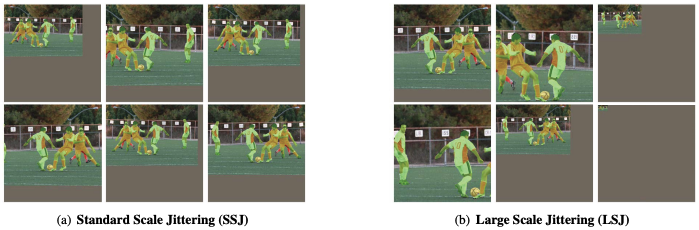

📝 Summary 📝 
- Scaling allows the model to learn from different sizes of objects in the scene, therefore increasing its robustness to generalize especially on newer scenes or object sizes.
- The Standard Scale Jitter (SSJ) range is \[0.8,1.25\].
- Ghiasi, et al. recommends a scale jitter range of \[0.1; 0.2\] (called Large Scale Jitter (LSJ) along with the Copy-Paste augmentation. CITE HERE!!

### DLC Implementation: *Jittering with only scaling*
During training, each image is randomly scaled within **\[scale_jitter_lo; scale_jitter_up\]** to augment training data. The default values for these two parameters are:
- scale_jitter_lo = 0.5
- scale_jitter_up = 1.25

💡Pro-tips:💡
- ⭐⭐⭐ If the target animal/s do not have an incredibly high variance in size throughout the video (e.g. jumping or moving towards the static camera), keeping the **default** values **unchanged** is **enough** ✅ because the lowest scale jitter value by default is 50% of the original image and the largest scale jitter value by default is 125% of the original image.

- ⭐⭐However, you may want to adjust these parameters if you want your model to:
  - handle new data with possibly **larger (25% bigger than original)** animal subjects ➡️ in this scenario, increase the value of *scale_jitter_up*
  - handle new data with possibly **smaller (50% smaller than the original)** animal subjects ➡️ in this scenario, decrease the value of *scale_jitter_lo*
  - **generalize well in new set-ups/environments** with minimal to no pre-training
  ⚠️ But as a consequence, **training time will take longer**.😔🕒
- ⭐If you have a fully static camera set-up and the sizes of the animals do not vary much, you may also try to **shorten** this range to **reduce training time**.😃🕒(⚠️ but, as a consequence, your model might only fit your data and not generalize well)

### Examples

In [ ]:
import 

## 3.3 rotation

### *What is 'rotation'?*
Rotation augmentations are done by rotating the image right or left on an axis between $1^{\circ}$ and $359^{\circ}$. Te safety of rotation augmentations is heavily determined by the rotation degree parameter. Slight rotations such as between $+1^{\circ}$ and $+20^{\circ}$ or $-1^{\circ}$ to $-20^{\circ}$ is generally an acceptable range. Keep in mind that as the rotation degree increases, the label of the data is no longer preserved post-transformation.

The image below, retrieved from CITE HERE, illustrates the difference between the different rotation degrees.
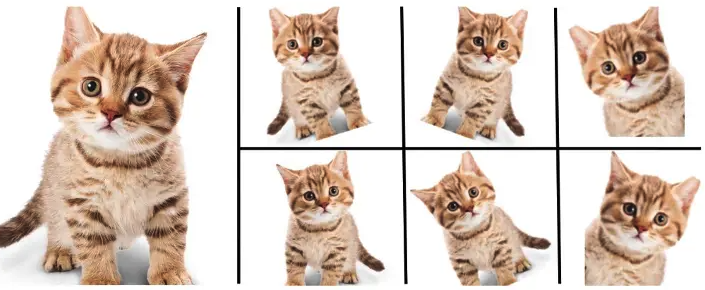


### DLC Implementation: 
During training, each image is rotated $+/-$ the **\rotation\** degree parameter set. By default, this parameter is set to 25, which means that the images are augmented with a $+25^{\circ}$ rotation of itself and a $-25^{\circ}$ degree rotation of itself. Should you want to opt out of this augmentation, set the rotation value to $False$.

💡Pro-tips:💡
- ⭐If you have labelled all the possible rotations of your animal/s, keeping the **default** value **unchanged** is **enough** ✅ 

- However, you may want to adjust this parameter if you want your model to:
  - handle new data with new rotations of the animal subjects 
  - handle the possibly unlabelled rotations of your minimally-labelled data 
    - But as a consequence, **the more you increase the rotation degree, the more the original keypoint labels may not be preserved**

### Examples


## 3.4 rotratio (rotation ratio)
### *What is a rotation ratio?*
This parameter in the DLC module is given by the percentage of sampled data to be augmented from your training data. The default value is set to $0.4$ or $40\%$. This means that $40\%$ of the training data is collected randomly for rotation augmentation.

💡Pro-tip:💡
- ⭐ Generally, keeping the **default** value **unchanged** is **enough** ✅ 

## 3.5 mirror (or a horizontal flip)
### *What is this mirror parameter about?
**Mirroring** or otherwise called **horizontal axis fipping** is much more common than fipping the vertical axis. This augmentation is one of the easiest to implement and has proven useful on datasets such as CIFAR-10 and ImageNet. However, on datasets involving text recognition such as MNIST or SVHN, this is not a label-preserving transformation.

The image below is an illustration of this property.
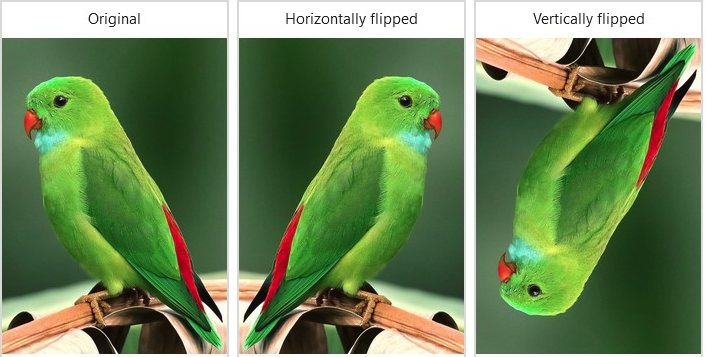

### DLC Implementation: 
This parameter randomly flips an image horizontally to augment training data.
By default, this parameter is set to $False$ especially on poses with mirror symmetric joints (for example, so the left  hand and right hand are not swapped).

💡Pro-tip:💡
- ⭐ If you work with labels with symmetric joints, keep the **default** value **unchanged**.✅
- Keeping the default value to $False$ will work well in most cases.

# 4. Final comments

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2